In [11]:
!pip install nltk


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [54]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
df = pd.read_csv("Tweets.csv")
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [18]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [21]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", str(text), flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered = [word for word in tokens if word not in stop_words]
    return " ".join(filtered)

df["clean_text"] = df["text"].apply(clean_text)

C:\Users\shrey\AppData\Local\Temp\ipykernel_6548\2385630895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="airline_sentiment", palette="coolwarm")


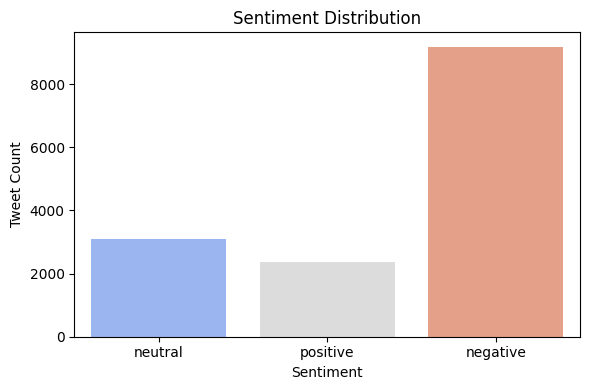

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="airline_sentiment", palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.tight_layout()
plt.show()

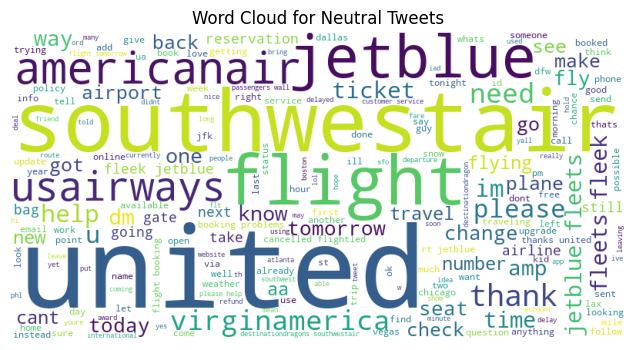

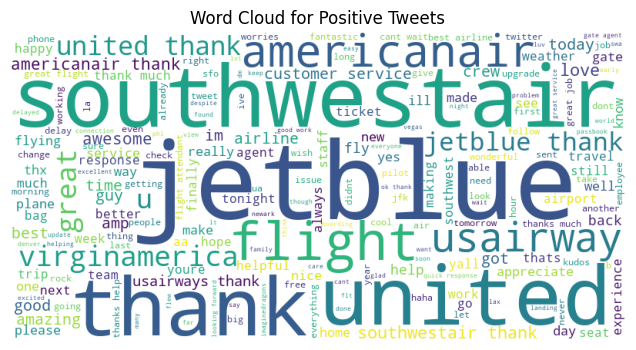

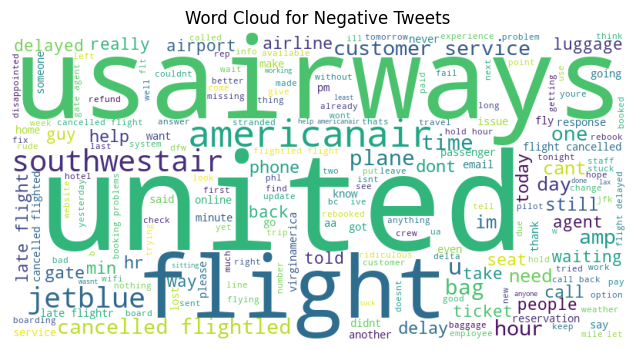

In [23]:
for sentiment in df["airline_sentiment"].unique():
    words = " ".join(df[df["airline_sentiment"] == sentiment]["clean_text"])
    plt.figure(figsize=(8, 4))
    plt.imshow(WordCloud(width=800, height=400, background_color="white").generate(words))
    plt.title(f"Word Cloud for {sentiment.capitalize()} Tweets")
    plt.axis("off")
    plt.show()

In [50]:
import pandas as pd
import numpy as np
df['tweet_created'] = pd.date_range(start='2023-01-01', periods=len(df), freq='H')
df.set_index('tweet_created', inplace=True)
df_resampled = df.resample('D')['airline_sentiment'].value_counts().unstack().fillna(0)
print(df_resampled.head())

airline_sentiment  negative  neutral  positive
tweet_created                                 
2023-01-01              6.0      5.0      13.0
2023-01-02              9.0      9.0       6.0
2023-01-03              5.0     14.0       5.0
2023-01-04             11.0     10.0       3.0
2023-01-05             10.0      5.0       9.0


C:\Users\shrey\AppData\Local\Temp\ipykernel_6548\1200055137.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['tweet_created'] = pd.date_range(start='2023-01-01', periods=len(df), freq='H')


<Figure size 1200x600 with 0 Axes>

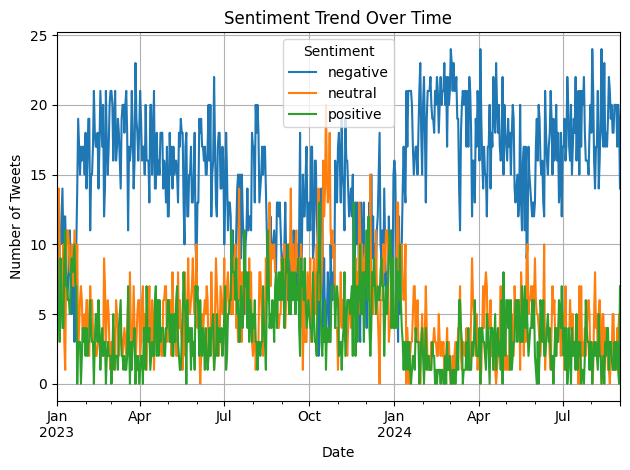

In [51]:
plt.figure(figsize=(12,6))
df_resampled.plot()
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()